In [44]:
import glob
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
from collections import Counter
from itertools import chain
import string
from wordcloud import WordCloud
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt


In [35]:
def remove_stop_words(tweet):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(tweet)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return filtered_sentence


def clean_tweet(tweet):
    # Remover trialing whitespace
    tweet = tweet.strip()

    # Remove @ mention
    tweet = re.sub(r'RT @[A-Za-z0-9]+', '', tweet)  # Remove the @ mention
    tweet = re.sub(r'@[A-Za-z0-9]+', '', tweet)  # Remove the @ mention
    tweet = re.sub(r'&amp+', '', tweet)  # Remove the @ mention

    # Remove Hyperlinks
    tweet = re.sub(r"http\S+", "", tweet).lower()

    # Remove Punctuation
    tweet = ''.join(c for c in tweet if c not in string.punctuation)

    # Remove Common English Words
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(tweet)
    filtered_tweet = [w for w in word_tokens if not w in stop_words]

    return filtered_tweet

In [36]:
path ='/Volumes/Samsung USB/Fall 2018/twitterdata' 
allFiles = glob.glob(path + "/Tweets*.csv")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
frame = pd.concat(list_)

tweets=frame["Tweet"].tolist()

clean_tweets= []
for tweet in tweets:
    z= clean_tweet(str(tweet))
    clean_tweets.append(z)
    

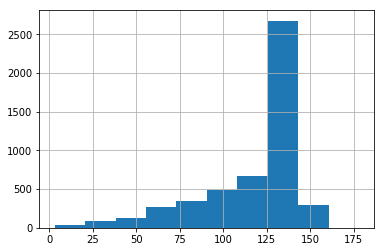

In [37]:
#Number Characters in Tweets
char_count = frame['Tweet'].str.len()
char_count.hist()




In [39]:
#Word Count Dictionary
word_count = Counter(list(chain.from_iterable(clean_tweets)))
print(word_count)

Counter({'marines': 308, 'us': 303, 'american': 295, 'trump': 268, 'african': 264, 'christians': 237, '’': 225, 'progressives': 217, 'navy': 217, 'immigration': 214, 'like': 199, '…': 195, 'people': 192, 'left': 186, 'wing': 180, 'refugees': 177, 'immigrants': 171, 'teenagers': 156, 'coast': 155, 'spoiled': 152, 'im': 144, 'guard': 143, 'via': 142, 'queer': 135, 'africanamerican': 128, 'de': 127, 'veterans': 126, 'dont': 125, 'leftwing': 122, 'new': 114, 'right': 112, 'get': 109, 'unions': 101, 'evangelicals': 101, 'need': 99, 'muslims': 95, 'want': 94, 'millennials': 94, 'hippies': 91, 'white': 90, 'one': 90, 'executive': 87, 'illegal': 86, 'vote': 83, 'niggers': 83, 'world': 82, 'love': 81, 'black': 80, '2': 79, 'iraq': 79, 'make': 77, 'many': 77, 'take': 77, 'time': 76, 'know': 76, 'middle': 76, 'would': 75, 'news': 73, 'women': 72, 'says': 71, 'latinas': 68, 'job': 67, 'first': 64, 'rt': 64, 'said': 64, 'obama': 63, '✖': 63, 'day': 62, '1': 62, 'radicals': 61, 'still': 61, 'see': 6

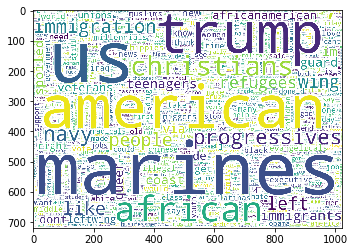

In [45]:
#Word Cloud 
wc = WordCloud(background_color="white",max_words=len(word_count),width = 1024,height = 720)
wc.generate_from_frequencies(word_count)

#Plot
plt.imshow(wc)
plt.show()